In [1]:
"""
Team Nova:
Arpit Palo
Arun Kumar
Nisarg Gupta
Omkar Kanade
"""

# Correlation Analysis and Hypothesis Testing for significance of correlation coefficient
# Code to get correlation between Food and Temperature related data

'\nTeam Nova:\nArpit Palo\nArun Kumar\nNisarg Gupta\nOmkar Kanade\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Temp_Food_Yearly.csv", engine="pyarrow", index_col=0)

In [4]:
df= df.drop(columns=["ice_accretion_6hr"])
df

,CountryCode,Year,tmpf,dwpf,mslp,sknt,feel,relh,p01i,Country,...,Root Crops (R&T)-Food Availability per capita-kg/cap/yr,Total Grains/Cereals and Root Crops (R&T)-Production Quantity-Grain Equiv. 1000 MT,Total Grains/Cereals and Root Crops (R&T)-Food Availability per capita-kg/cap/yr,Total Grains/Cereals and Root Crops (R&T)-Food Supply-Grain Equiv. 1000 MT,Total Grains/Cereals and Root Crops (R&T)-Area Harvested-1000 Ha,Other-Food Supply-Grain Equiv. 1000 MT / yr,Other-Food Supply-Grain Equiv. kg/cap/yr,Food Aid-Cereal Food Aid-Grain Equiv. 1000 MT,Food Aid-Total-Grain Equiv. 1000 MT,Food Aid-Non-Cereal Food Aid-Grain Equiv. 1000 MT
,,,,,,,,,,,,,,,,,,,,,
0,AF,1980,63.507106,40.293937,1012.071430,4.025317,62.544066,49.311788,NaN,Afghanistan,...,NaN,3933.805000,NaN,3950.905000,3036.400,NaN,NaN,NaN,NaN,NaN
1,AF,1981,64.205946,41.658434,1012.353722,3.823075,63.820333,49.646717,NaN,Afghanistan,...,NaN,3763.130000,NaN,3859.630000,2926.700,NaN,NaN,NaN,NaN,NaN
2,AF,1982,62.434431,40.484110,1013.034734,2.743667,61.751409,51.655215,NaN,Afghanistan,...,NaN,3602.788000,NaN,3677.688000,2817.100,NaN,NaN,NaN,NaN,NaN
3,AF,1983,63.557293,41.876919,1012.432635,3.554338,63.099168,51.061917,NaN,Afghanistan,...,NaN,3474.450000,NaN,3553.953000,2666.000,NaN,NaN,NaN,NaN,NaN
4,AF,1984,63.021090,40.408504,1012.665623,3.779191,62.323171,49.637630,NaN,Afghanistan,...,NaN,3306.778000,NaN,3327.928000,2580.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,ZW,2009,69.178092,51.142729,987.033333,5.766506,68.992368,58.371197,NaN,Zimbabwe,...,7.190499,1677.731196,141.317483,2256.195171,2146.740,659.317759,252.422208,217.997711,287.112748,69.115038
1818,ZW,2010,70.479057,54.122931,996.616667,5.562661,70.427815,61.400107,0.0,Zimbabwe,...,7.113236,1723.572567,136.990970,2094.336542,1951.794,664.444728,248.095696,63.648974,98.299925,34.650952
1819,ZW,2011,69.492740,51.344388,951.916667,5.717720,69.263550,58.139460,0.0,Zimbabwe,...,7.448523,1765.470308,139.933312,2407.634283,1994.544,674.117259,251.038038,32.984747,57.430583,24.445836


In [5]:
developed_countries = ['AU', 'CA', 'CN', 'IE', 'DK', 'CH', 'US']
developing_countries = ['UG', 'SD', 'UZ', 'ER', 'AZ']

In [6]:
df.columns

Index(['CountryCode', 'Year', 'tmpf', 'dwpf', 'mslp', 'sknt', 'feel', 'relh',
       'p01i', 'Country', 'Total Grains/Cereals-Area Harvested-1000 Ha',
       'Total Grains/Cereals-Yield-MT / Ha',
       'Total Grains/Cereals-Production Quantity-1000 MT',
       'Economic Data-Gross Domestic Product, constant prices-Percent change',
       'Economic Data-GDP (constant 2005 US$)-Million',
       'Economic Data-Imports of goods and services (constant 2005 US$)-Million',
       'Economic Data-Exports of goods and services (constant 2005 US$)-Million',
       'Economic Data-WB GDP (constant 2005 US$) / FAO population-$/Person',
       'Total Grains/Cereals-Import Quantity-1000 MT',
       'Total Grains/Cereals-Import Value-Million US$',
       'Total Grains/Cereals-Import Unit Value-US$ / MT',
       'Total Grains/Cereals-Export Quantity-1000 MT',
       'Total Grains/Cereals-Stock Variation-1000 MT',
       'Total Grains/Cereals-Feed + Seed-1000 MT',
       'Total Grains/Cereals-Waste + Pr

In [7]:
df.isna().sum()

CountryCode                                                                                         0
Year                                                                                                0
tmpf                                                                                                2
dwpf                                                                                               10
mslp                                                                                              357
sknt                                                                                                2
feel                                                                                               10
relh                                                                                               10
p01i                                                                                              672
Country                                                                           

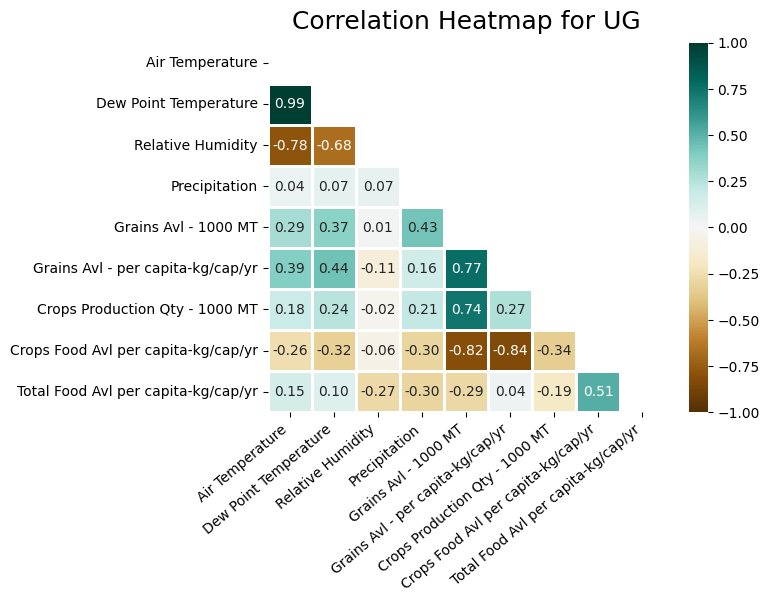

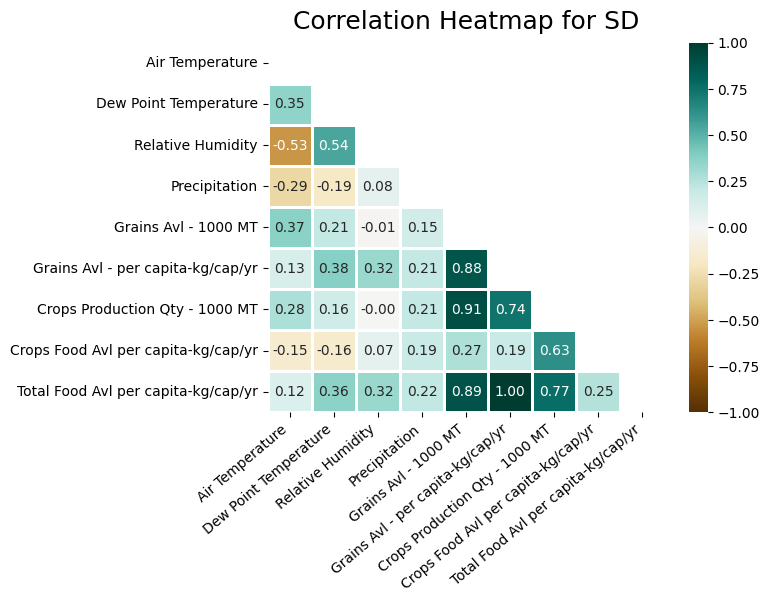

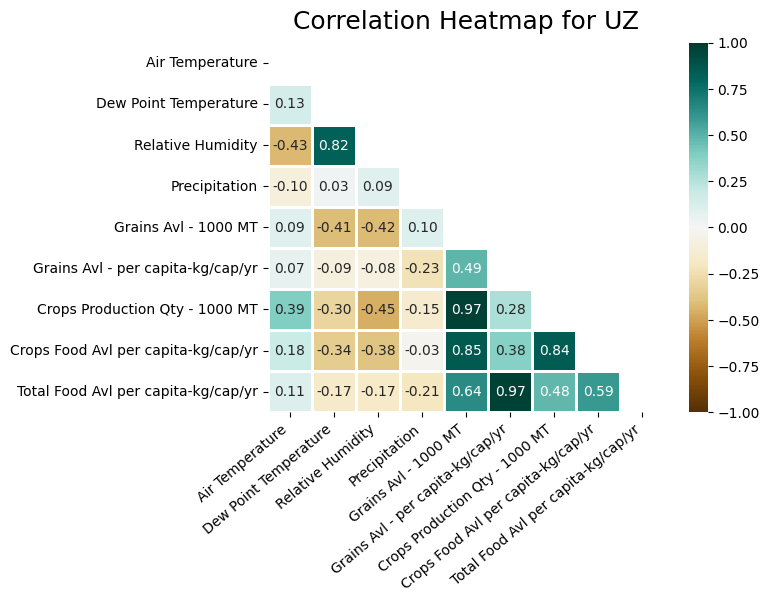

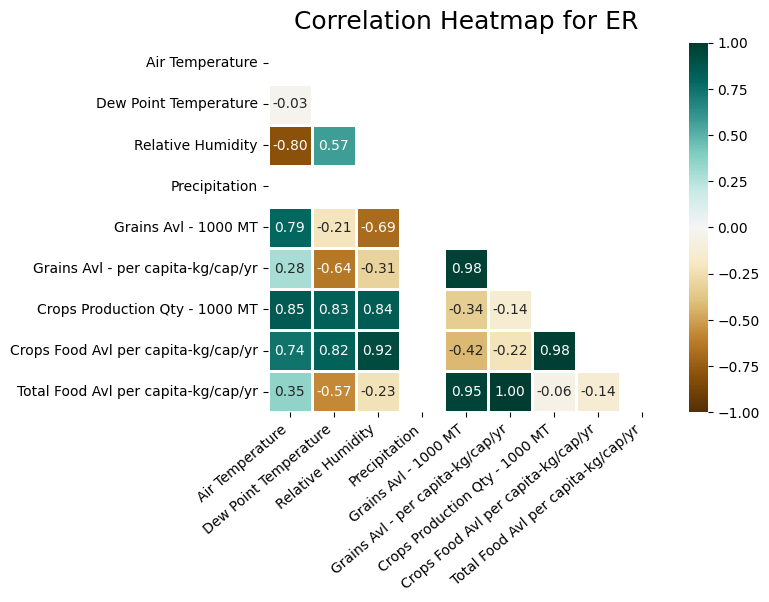

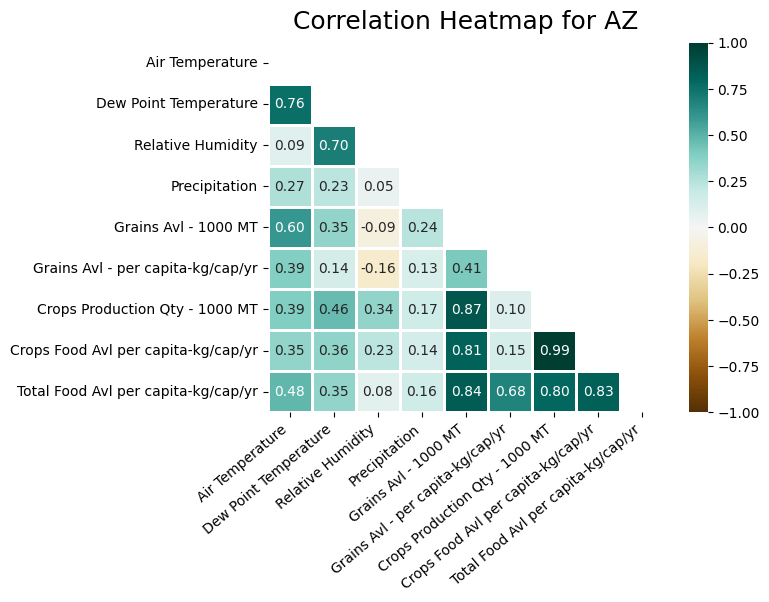

In [19]:
df = df.rename(columns = {'tmpf': 'Air Temperature',
                          'dwpf': 'Dew Point Temperature',
                          'relh': 'Relative Humidity',
                          'p01i': 'Precipitation',
                          'Total Grains/Cereals-Food Availability-1000 MT': 'Grains Avl - 1000 MT',
                          'Total Grains/Cereals-Food Availability per capita-kg/cap/yr': 'Grains Avl - per capita-kg/cap/yr',
                          'Root Crops (R&T)-Production Quantity-Grain Equiv. 1000 MT': 'Crops Production Qty - 1000 MT',
                          'Root Crops (R&T)-Food Availability per capita-kg/cap/yr': 'Crops Food Avl per capita-kg/cap/yr',
                          'Total Grains/Cereals and Root Crops (R&T)-Food Availability per capita-kg/cap/yr': 'Total Food Avl per capita-kg/cap/yr'})
for country in developing_countries:
    df_country = df.loc[df["CountryCode"] == country]
    cols_to_show = ['Air Temperature',
                    'Dew Point Temperature',
                    'Relative Humidity',
                    'Precipitation',
                    'Grains Avl - 1000 MT',
                    'Grains Avl - per capita-kg/cap/yr',
                    'Crops Production Qty - 1000 MT',
                    'Crops Food Avl per capita-kg/cap/yr',
                    'Total Food Avl per capita-kg/cap/yr']
    corr_mat = df_country[cols_to_show].corr()
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', linewidths=2, fmt=".2f")
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 40, horizontalalignment = "right")
    heatmap.set_title('Correlation Heatmap for {}'.format(country), fontdict={'fontsize':18}, pad=10)
    plt.savefig('{}_Corr.png'.format(country))
    plt.show()

In [9]:
from scipy import stats
cnt = 0
for country in df["CountryCode"].unique():
    df_country = df.loc[df["CountryCode"] == country].fillna(0)
    corr_coeff, p_val = stats.pearsonr(df_country['Air Temperature'], df_country['Total Food Avl per capita-kg/cap/yr'])
    if abs(corr_coeff) > 0.5 and p_val < 0.05:
        cnt += 1
        print(country, corr_coeff, p_val) 

AZ 0.584521715123462 0.00028336776746666175
BI 0.9940583112469622 0.0005493021007046425
BJ 0.7361457366020933 0.02373119027218157
CM -0.7091071561913872 0.02166155558396932
DZ 0.5875333059680723 0.0002588628116796037
ER 0.7919835137043636 0.00043280069021220044
GN 0.7591837609562799 0.01766563553730617
ID 0.7405370930680398 5.528196350791004e-07
MW 0.5482978374035934 0.0007875356249567197
RW -0.9606684064094375 0.00930823284036154
SV -0.632594962094702 0.015190764735714233
TG 0.5391105036377788 0.0010024026464098557


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
cnt

12

In [ ]:
len(df["CountryCode"].unique())

68

In [ ]:
cnt / len(df["CountryCode"].unique())

0.17647058823529413